In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from pathlib import Path
from numpy.random import RandomState

_PRNG = RandomState(0)

In [2]:
_DATA_DIR = "./data"

names = []
dataset = []

for file_name in os.listdir(_DATA_DIR):
    if file_name.endswith(".csv"):
        full_file_path = _DATA_DIR + "/" + file_name
        print(full_file_path)
        dataset.append(pd.read_csv(full_file_path))
        names.append(file_name[10:16])

./data/LoanStats_2016Q1.csv


C:\Users\juszhan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


./data/LoanStats_2016Q2.csv
./data/LoanStats_2016Q3.csv


C:\Users\juszhan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


./data/LoanStats_2016Q4.csv
./data/LoanStats_2017Q1.csv


C:\Users\juszhan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (112) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


./data/LoanStats_2017Q2.csv
./data/LoanStats_2017Q3.csv
./data/LoanStats_2017Q4.csv
./data/LoanStats_2018Q1.csv


C:\Users\juszhan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


./data/LoanStats_2018Q2.csv
./data/LoanStats_2018Q3.csv
./data/LoanStats_2018Q4.csv


In [18]:
verification_status = {k:[] for k in dataset[0]["verification_status"].unique()}

for df in dataset:
    for k,v in df["verification_status"].value_counts().iteritems():
        verification_status[k].append(v)

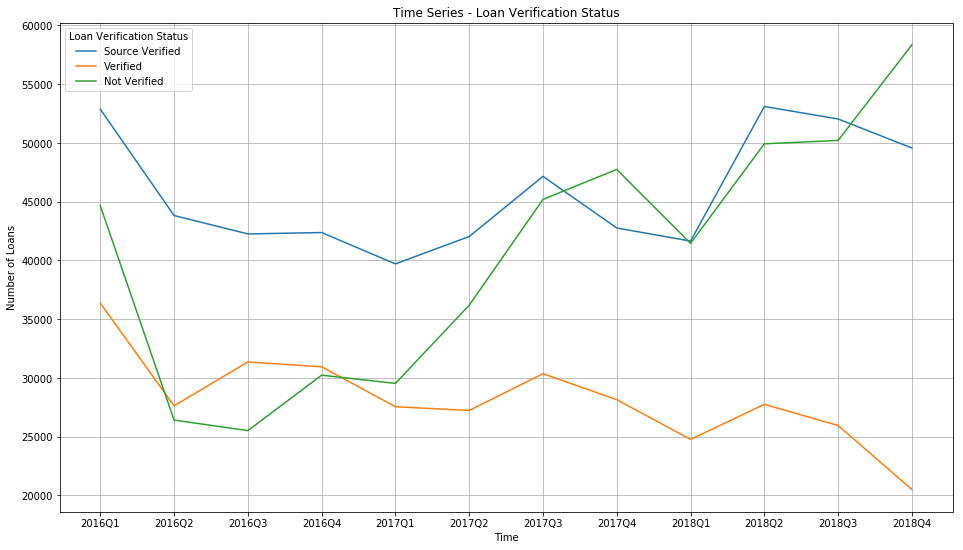

In [50]:
plt.figure(figsize=(16,9))

x = list(range(len(x)))
for k in verification_status.keys():
    y = verification_status[k]
    plt.plot(x, y, label=k)
plt.xticks(ticks=list(range(len(names))), labels=names)
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Number of Loans")
plt.legend(title="Loan Verification Status")
plt.title("Time Series - Loan Verification Status")
plt.show()

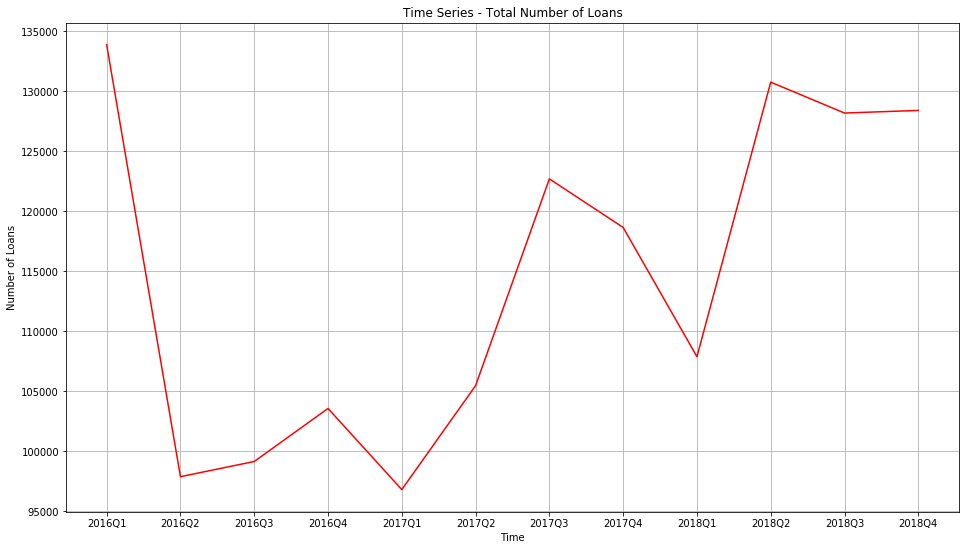

In [67]:
plt.figure(figsize=(16,9))

x = list(range(len(x)))
plt.plot(x, [len(df) for df in dataset], color="red")
plt.xticks(ticks=list(range(len(names))), labels=names)
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Number of Loans")
plt.title("Time Series - Total Number of Loans")
plt.show()

In [59]:
verification_status

{'Source Verified': [52872,
  43820,
  42253,
  42370,
  39703,
  42033,
  47151,
  42757,
  41644,
  53100,
  52037,
  49566],
 'Verified': [36362,
  27623,
  31356,
  30944,
  27545,
  27230,
  30359,
  28146,
  24769,
  27748,
  25948,
  20496],
 'Not Verified': [44653,
  26411,
  25511,
  30232,
  29531,
  36188,
  45191,
  47745,
  41451,
  49924,
  50209,
  58350]}

<Figure size 1152x648 with 0 Axes>

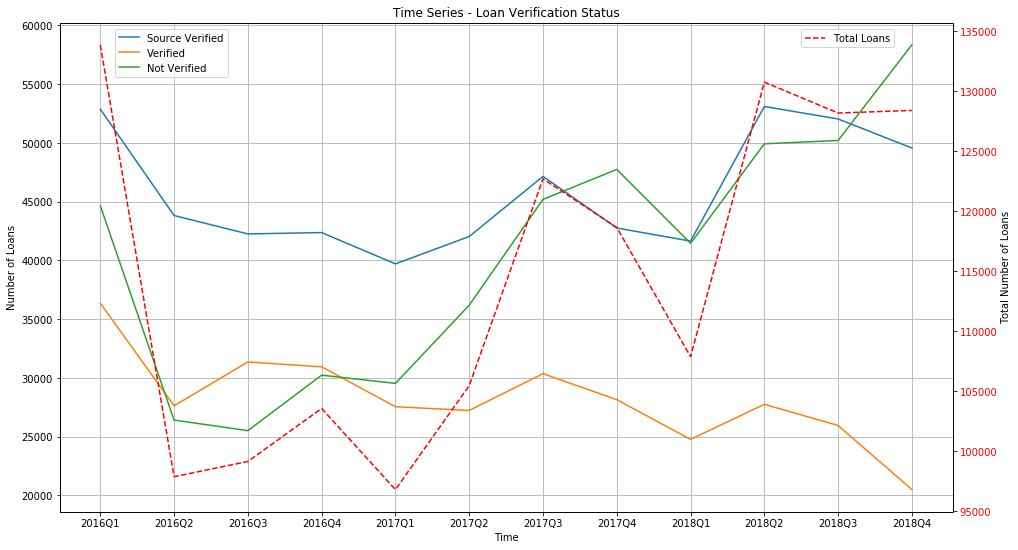

In [98]:
plt.figure(figsize=(16,9))

x = list(range(len(x)))

fig, ax = plt.subplots(figsize=(16,9))

for k in verification_status.keys():
    y = verification_status[k]
    ax.plot(x, y, label=k)
    
ax_right = ax.twinx()
ax_right.plot(x, [len(df) for df in dataset], label="Total Loans", color="red", linestyle="--")

plt.xticks(ticks=list(range(len(names))), labels=names)
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel("Number of Loans")
ax.legend(loc=(.062, .889))

ax_right.set_ylabel("Total Number of Loans")
ax_right.tick_params(axis='y', labelcolor="red")
ax_right.legend(loc=(.83, .95))

plt.title("Time Series - Loan Verification Status")
plt.show()